In [1]:
from astropy.coordinates import SkyCoord, EarthLocation
from Helper_funcs import *
from Scheduler import *
import astropy.coordinates as coord
import astropy.units as u
from tabulate import tabulate
from astropy.time import Time
import sqlite3
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
connect = sqlite3.connect('Database.db')
add_randome_data(10)
cont = sqlite_retrieve_table(connect, 'Schedule')

INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M1', 'False', 'Outreach/schools', '1', '227', '08-08-2020', '11-07-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M2', 'True', 'Outreach/schools', '9', '152', '03-03-2020', '19-11-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M3', 'False', 'Outreach/schools', '49', '277', '05-05-2021', '28-09-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M4', 'True', 'Moderator', '40', '277', '21-05-2021', '02-12-2021', 'None');
INSERT INTO Schedule(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority) VALUES('M5', 'True', 'Public

In [3]:
print('({:}, {:}, {:}, {:}, {:}, {:}, {:}, {:})'.format(*[key for key in cont[0]]))
print('| {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} |'.format(*[key for key in cont[0]]))
print('-'*185)
for i in range(len(cont)):
    print('| {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} | {:20} |'.format(*[cont[i][key] for key in cont[i]]))

(object, time_sensitive, Observer_type, Rarity, total_length, Submission_Date, Completed_by, priority)
| object               | time_sensitive       | Observer_type        | Rarity               | total_length         | Submission_Date      | Completed_by         | priority             |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| M1                   | False                | Outreach/schools     |                    1 |                  227 | 08-08-2020           | 11-07-2021           | None                 |
| M2                   | True                 | Outreach/schools     |                    9 |                  152 | 03-03-2020           | 19-11-2021           | None                 |
| M3                   | False                | Outreach/schools     |                   49 |                  277 | 05-05-2021           | 28-09-2021   

In [4]:
objects = daily_Schedule('Database.db', 'Schedule')
for i in range(len(objects)):
    objects[i]['min_cond'] = {}

In [5]:
objects = night_schedule(objects)

{'moon': 0.2, 'Sunset': datetime.datetime(2021, 7, 7, 22, 2), 'Sunrise': datetime.datetime(2021, 7, 8, 5, 27)}


In [6]:
print(tabulate([[objects[i][key] for key in objects[i]] for i in range(len(objects))], headers=[key for key in objects[0]]))

object    time_sensitive    Observer_type       Rarity    total_length  Submission_Date    Completed_by      priority  min_cond    Possible
--------  ----------------  ----------------  --------  --------------  -----------------  --------------  ----------  ----------  ----------
M4        True              Moderator               40             277  21-05-2021         02-12-2021            53.9  {}          False
M1        False             Outreach/schools         1             227  08-08-2020         11-07-2021            36.6  {}          False
M9        True              OA                      46             252  21-05-2020         20-08-2021             8.9  {}          False
M2        True              Outreach/schools         9             152  03-03-2020         19-11-2021             7.6  {}          True
M7        False             Student (Thesis)        45             177  17-09-2020         01-11-2021             5.9  {}          False
M8        True              Studen

In [20]:
weather = get_predicted_conditions()
weather['Visibility']

[10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000,
 10000]

<Figure size 864x864 with 0 Axes>

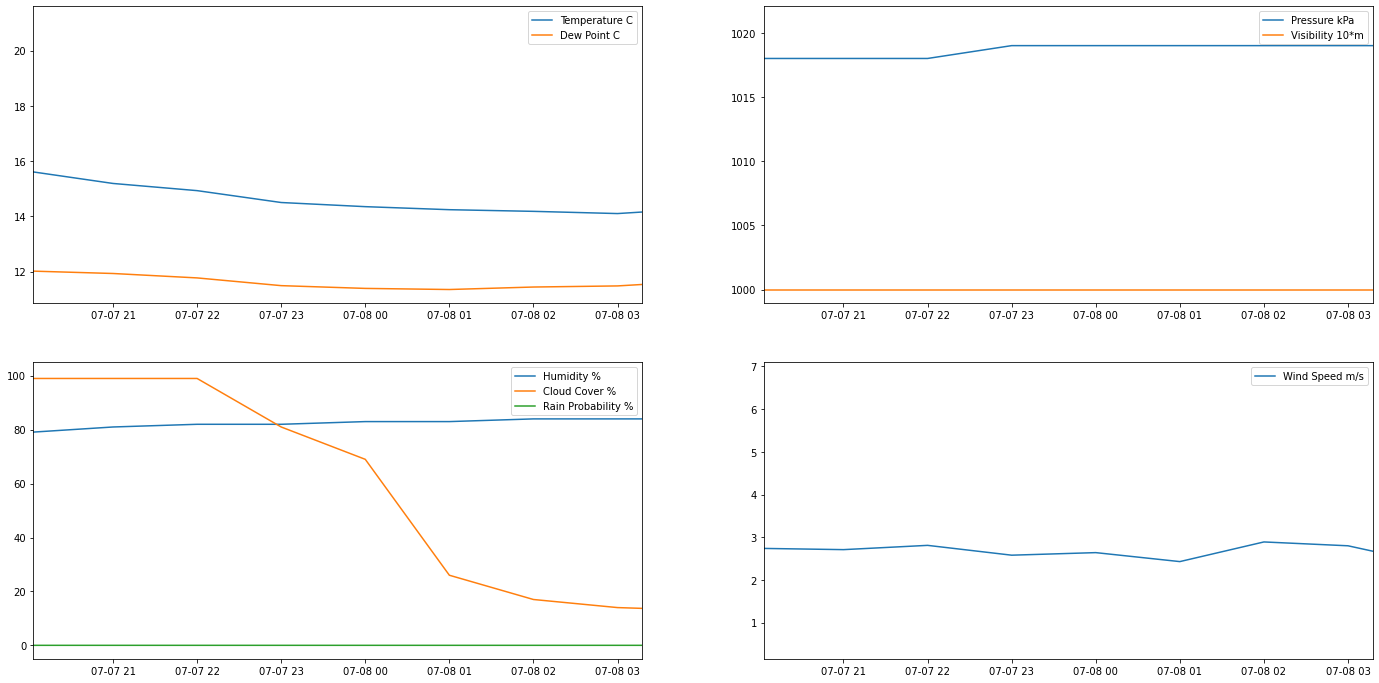

In [25]:
import matplotlib.pyplot as plt
keys = {'Temperature', 'Pressure', 'Humidity', 'Dew_Point', 'Cloud_cover', 'Visibility', 'Wind_Speed', 'Wind_direction', 'Rain_Prob', 'Time', 'Moon', 'Sunset', 'Sunrise'}
fig = plt.figure(figsize=(12,12))
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(24,12))
ax[0,0].plot(weather['Time'],np.array(weather['Temperature'])-273.15,label='Temperature C')
ax[0,0].plot(weather['Time'],np.array(weather['Dew_Point'])-273.15,label='Dew Point C')
ax[0,1].plot(weather['Time'],np.array(weather['Pressure']),label='Pressure kPa')
ax[0,1].plot(weather['Time'],np.array(weather['Visibility'])/10,label='Visibility 10*m')
ax[1,0].plot(weather['Time'],np.array(weather['Humidity']),label='Humidity %')
ax[1,0].plot(weather['Time'],np.array(weather['Cloud_cover']),label='Cloud Cover %')
ax[1,0].plot(weather['Time'],np.array(weather['Rain_Prob']),label='Rain Probability %')
ax[1,1].plot(weather['Time'],np.array(weather['Wind_Speed']),label='Wind Speed m/s')
for j in range(len(ax)):
    for i in range(len(ax[j])):
        ax[j][i].set_xlim(weather['Sunset'],weather['Sunrise'])
        ax[j][i].legend()
plt.show()